## Load Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

import sys 
sys.path.append("..")

import numpy as np
from importlib import reload 
import networkx as nx 
from tqdm import tqdm 

import torch
import torch_geometric as geonn
from torch_geometric.loader import DataListLoader, DataLoader

from utilities import reader
import vis

import test as tst

from importlib import reload

Random seed set as 1234


## Load GPU and test dataset

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Running on {}. GPU model : {}".format(device, torch.cuda.get_device_name(0)))

path_dataset = "../../dataset/dConstant"

dataset_test = reader.BuildDataset(root = path_dataset, mode = 'test', precision = torch.float)
loader_test = DataListLoader(dataset_test,  batch_size = 50, shuffle = False, num_workers = 0)
print("Number of samples in the test dataset : ", len(dataset_test))

Running on cuda. GPU model : Quadro T2000 with Max-Q Design
Number of samples in the test dataset :  2000


Run the following cell to compute the average diameter of the samples in the test dataset

In [3]:
# distance = []
# for k in tqdm(range(len(dataset_test))):

#     data = dataset_test[k]
#     dictpos = {}
#     for i in range(len(data.pos)):
#         dictpos[i] = np.asarray([data.pos[i,0].item(), data.pos[i,1].item()])
    
#     net_data = geonn.utils.to_networkx(data, to_undirected = False, remove_self_loops=False)
#     G = net_data.to_undirected()
#     G.remove_edges_from(nx.selfloop_edges(G))
#     G.remove_nodes_from(list(nx.isolates(G)))
#     d = nx.distance_measures.diameter(G)
#     distance.append(d)
#     dictpos.clear()
    
# print("Mean geodesic distance : ", np.mean(distance))
# print("Max geodesic distance : ", np.max(distance))
# print("Min geodesic distance : ", np.min(distance))

In [4]:
ckpt = torch.load("../results/dss_results/ckpt/running_model.pt")

list_running_train_model = [ckpt["hist_train"]]
list_running_val_model = [ckpt["hist_val"]]
list_running_names = ["DSS"]

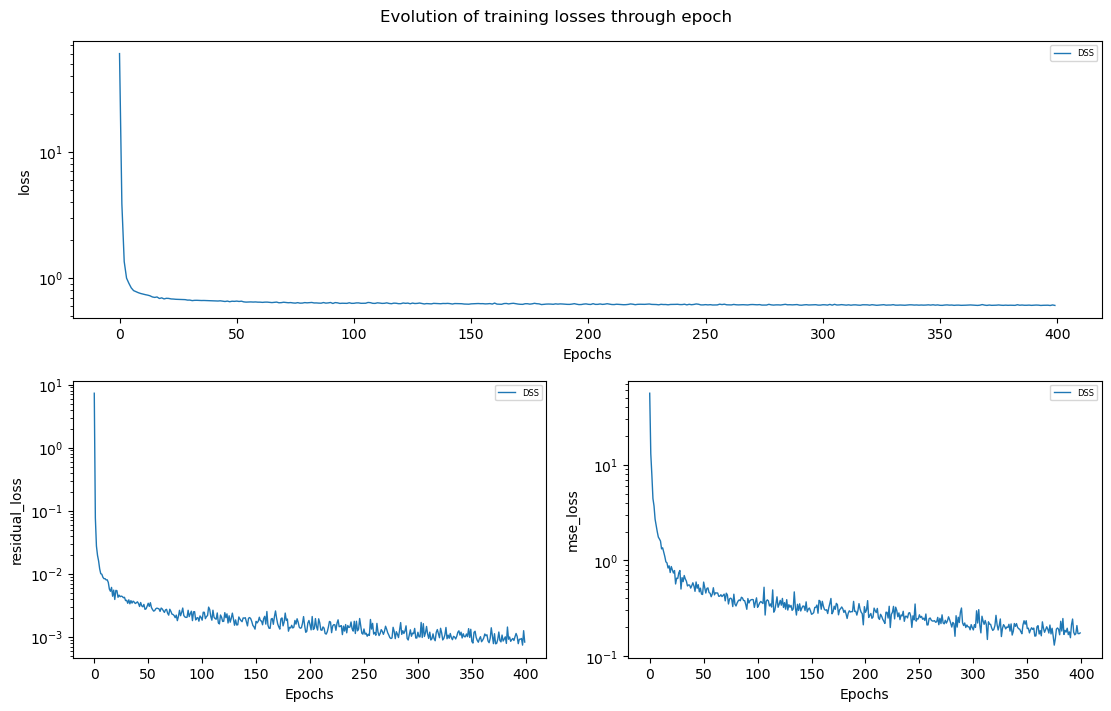

In [5]:
reload(vis)
vis.visualize_losses(list_running_train_model, list_running_names)

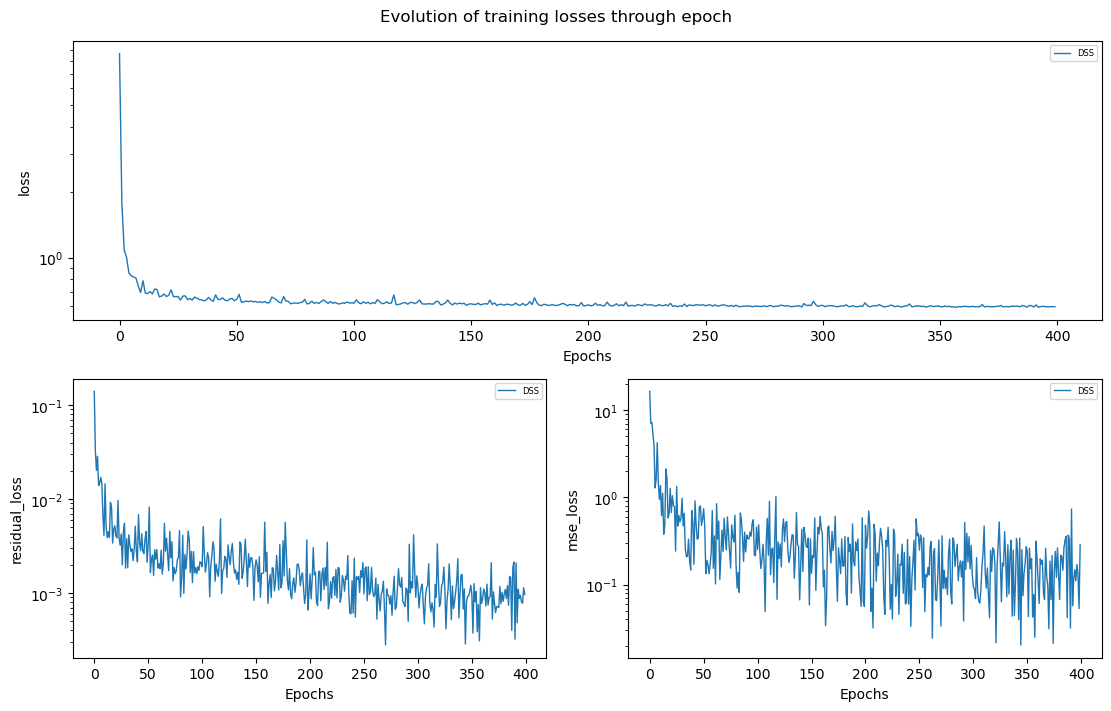

In [6]:
reload(vis)
vis.visualize_losses(list_running_val_model, list_running_names)

In [7]:
ckpt_best = torch.load("../results/dss_results/ckpt/best_model.pt")
list_best_model = [ckpt_best]
list_names = ["DSS"]

### Test on the full dataset

In [8]:
reload(tst)

tst.test_dataset(list_best_model, list_names, loader_test, device)

Evaluation model :  DSS
Default config :  {'latent_dim': 10, 'k': 30, 'alpha': 0.001, 'gamma': 0.9, 'path_logs': 'results/22_08_2023_15:44:17/logs'}


100%|██████████| 40/40 [00:05<00:00,  7.32it/s]

std Res :  0.0002477086961012139
std MSE :  0.02014436117045057
std Dirichlet :  0.00168172002075136
┍━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┑
│ Name   │   Residual │       MSE │   MSEDirichlet │
┝━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┥
│ DSS    │  2.255e-04 │ 3.004e-02 │      4.905e-04 │
┕━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┙


In [10]:
import time
t = 1000 * time.time()
np.random.seed(int(t) % 2**32)

alea = np.random.randint(len(dataset_test))
print("Random sample : ", alea)

data = dataset_test[1406]
print(data)

Random sample :  861
Data(x=[465, 1], edge_index=[2, 2376], edge_attr=[2376, 1], pos=[465, 2], edge_attr_norm=[2376, 1], b_prime=[465, 3], b_prime_norm=[465, 3], tags=[465, 1])


Default config :  {'latent_dim': 10, 'k': 30, 'alpha': 0.001, 'gamma': 0.9, 'path_logs': 'results/22_08_2023_15:44:17/logs'}
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┑
│   Nb nodes │   Residual │       MSE │   MSEDirichlet │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┥
│        465 │  1.930e-04 │ 3.789e-02 │      3.823e-04 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┙


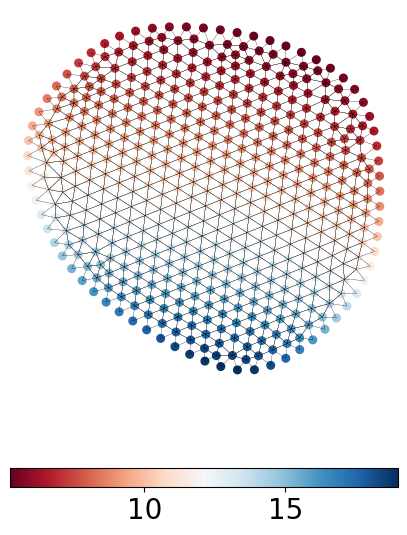

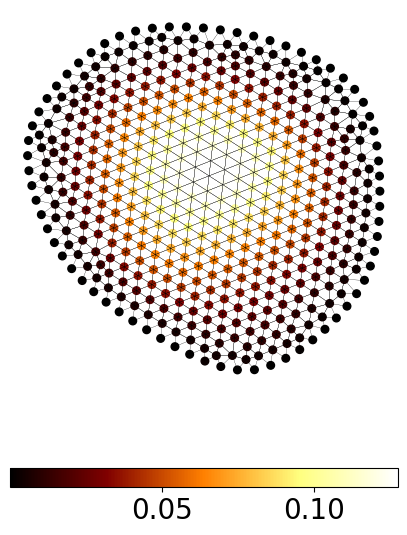

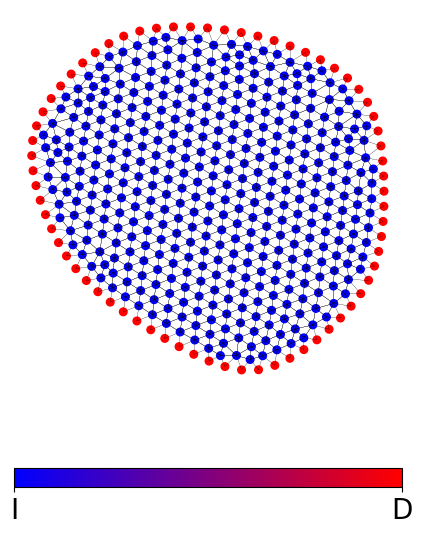

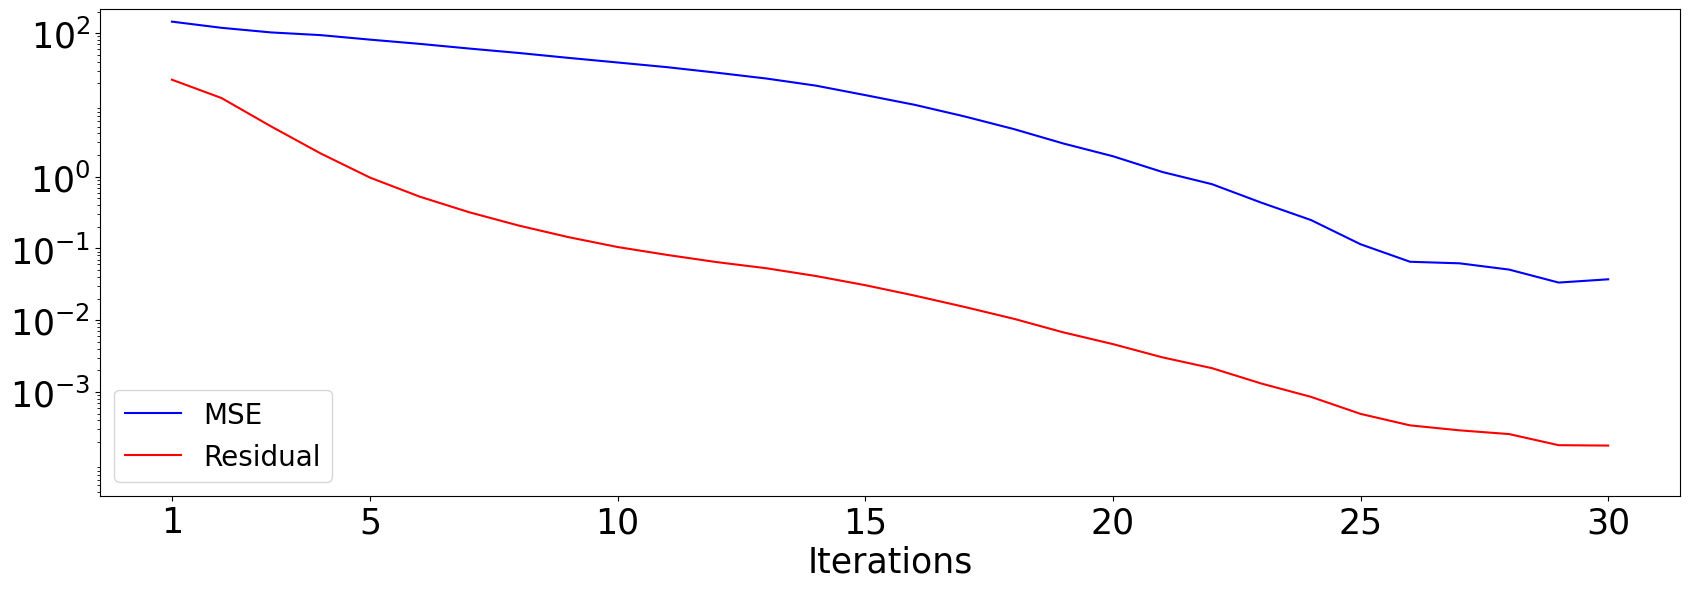

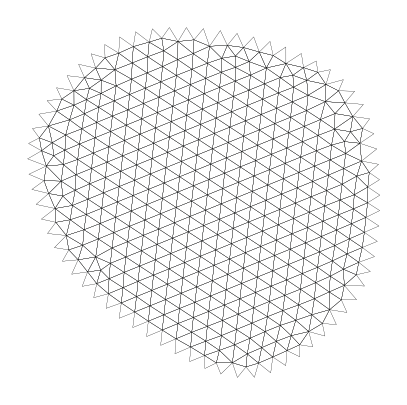

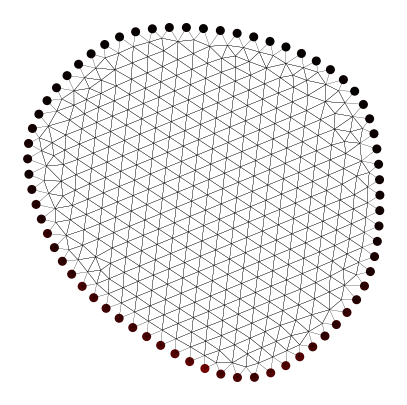

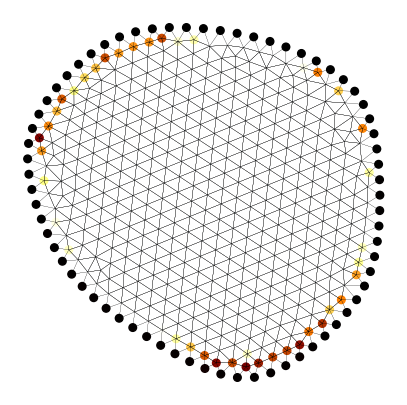

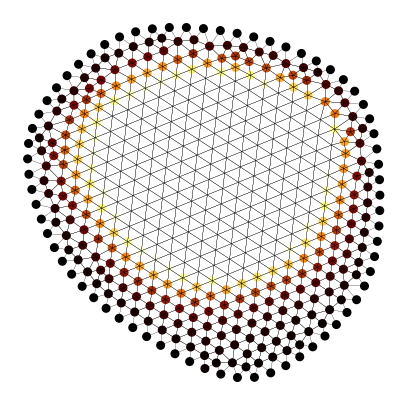

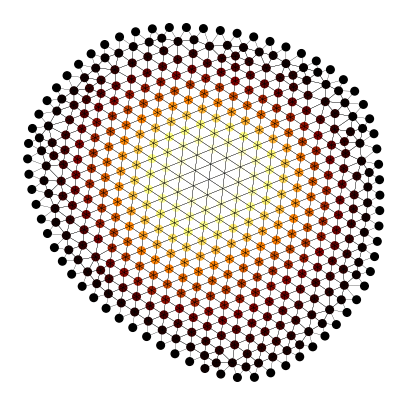

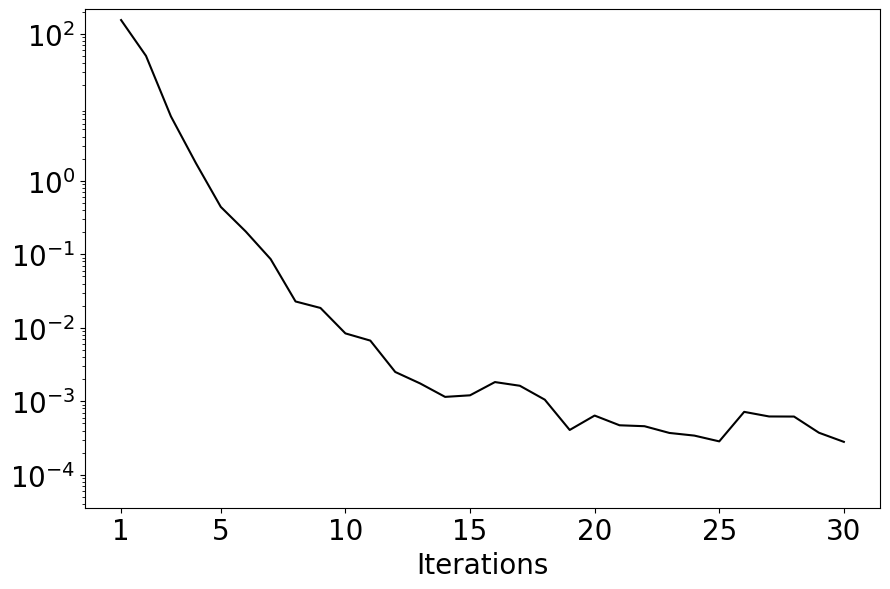

In [11]:
reload(vis)
reload(tst)

tst.solution_sample(ckpt_best, data, device)